Import Data

In [1]:
import pandas as pd

df_diabetes = pd.read_csv("diabetes_prediction_dataset.csv")

df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Gather Initial Insights for Feature Scaling

In [2]:
df_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [3]:
df_diabetes_positive = df_diabetes[df_diabetes['diabetes']==1]
df_diabetes_negative = df_diabetes[df_diabetes['diabetes']==0]

In [4]:
df_diabetes_positive.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.0
mean,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706,1.0
std,14.549880,0.430496,0.356167,7.558371,1.076562,58.641111,0.0
min,3.000000,0.000000,0.000000,10.980000,5.700000,126.000000,1.0
25%,52.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.0
50%,62.000000,0.000000,0.000000,29.970000,6.600000,160.000000,1.0
75%,72.000000,0.000000,0.000000,35.912500,7.500000,240.000000,1.0
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.0


In [5]:
df_diabetes_negative.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.0
mean,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470,0.0
std,22.306005,0.235595,0.168465,6.373406,0.971628,34.247281,0.0
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.0
25%,22.000000,0.000000,0.000000,23.240000,4.800000,100.000000,0.0
50%,40.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.0
75%,57.000000,0.000000,0.000000,28.870000,6.200000,158.000000,0.0
max,80.000000,1.000000,1.000000,95.690000,6.600000,200.000000,0.0


<Axes: xlabel='age'>

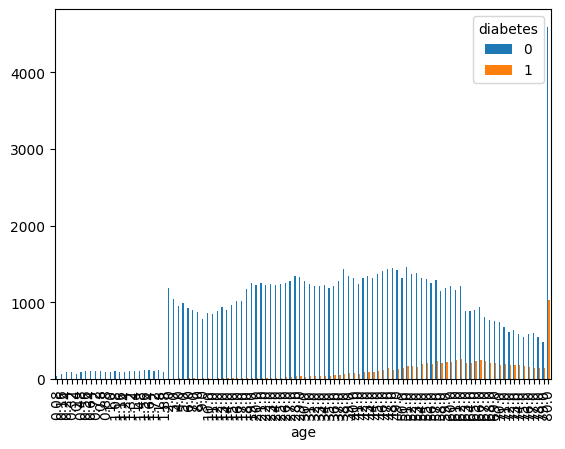

In [6]:
pd.crosstab(df_diabetes.age, df_diabetes.diabetes).plot(kind='bar')

<Axes: xlabel='hypertension'>

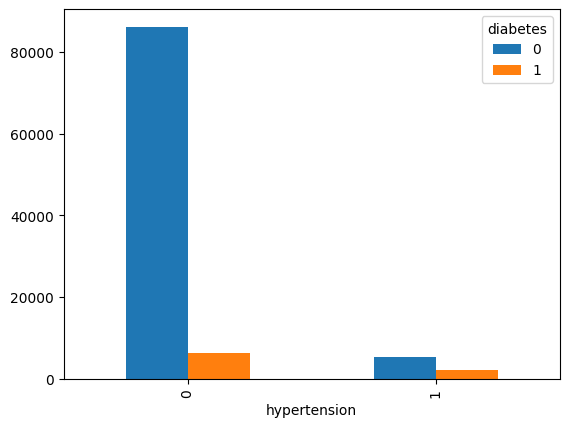

In [7]:
pd.crosstab(df_diabetes.hypertension, df_diabetes.diabetes).plot(kind='bar')

<Axes: xlabel='heart_disease'>

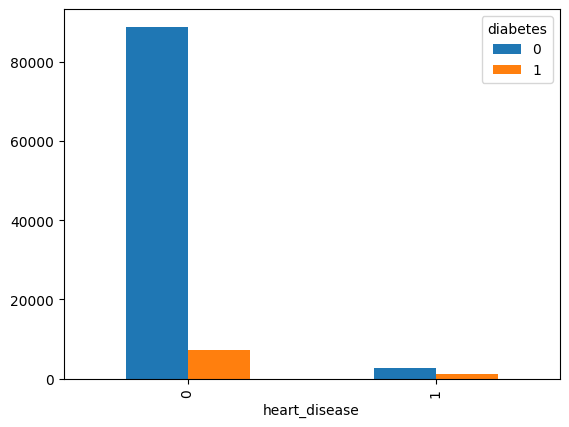

In [8]:
pd.crosstab(df_diabetes.heart_disease, df_diabetes.diabetes).plot(kind='bar')

<Axes: xlabel='smoking_history'>

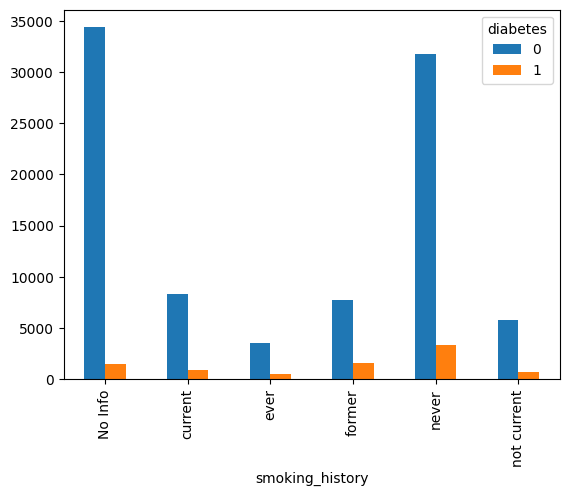

In [9]:
pd.crosstab(df_diabetes.smoking_history, df_diabetes.diabetes).plot(kind='bar')

<Axes: xlabel='HbA1c_level'>

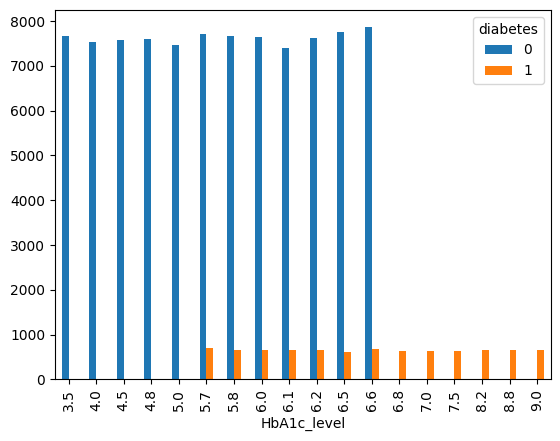

In [10]:
pd.crosstab(df_diabetes.HbA1c_level, df_diabetes.diabetes).plot(kind='bar')

<Axes: xlabel='blood_glucose_level'>

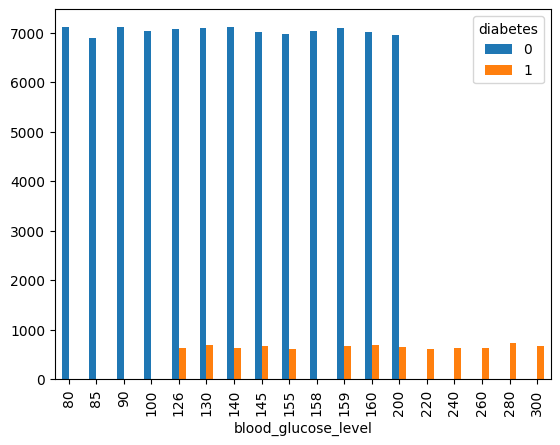

In [11]:
pd.crosstab(df_diabetes.blood_glucose_level, df_diabetes.diabetes).plot(kind='bar')

hypertension, heart_disease, smoking and diabetes are all categorical data. smoking_history contains multiple classes and will need to be one hot encoded.

In [12]:
print("Missing values in df_diabetes data before imputation:", df_diabetes.isnull().sum())

Missing values in df_diabetes data before imputation: gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


No imputation needed in terms of missing feature values. However, there are about 35k data points in the smoking_history feature labeled as no information. This could be a problem. I will train the model first without this feature. Depending on how training goes I may impute it later and add it in. gender will need to be numericalized too.

In [13]:
df_diabetes.drop("smoking_history", axis=1, inplace=True)
df_diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


Feature Scaling

In [14]:
import numpy as np

diabetes_array = df_diabetes.to_numpy()

diabetes_array.shape

(100000, 8)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale =  [1, 4, 5, 6]

diabetes_array_scaled = diabetes_array.copy()
diabetes_array_scaled[:, columns_to_scale] = scaler.fit_transform(diabetes_array[:, columns_to_scale])



In [17]:
diabetes_array_scaled[:, 0:8]

array([['Female', 1.6927035405262736, 0, ..., 1.0017057235688864,
        0.04770421587098508, 0],
       ['Female', 0.5380064272004933, 0, ..., 1.0017057235688864,
        -1.426209989644696, 0],
       ['Male', -0.616690686125287, 0, ..., 0.16110802156803655,
        0.4898784775256894, 0],
       ...,
       ['Male', 1.0709435564277765, 0, ..., 0.16110802156803655,
        0.4161827672499054, 0],
       ['Female', -0.7943363958677148, 0, ..., -1.4266876377669033,
        -0.9349052544728024, 0],
       ['Female', 0.6712407095073141, 0, ..., 1.0017057235688864,
        -1.1805576220587493, 0]], dtype=object)

One Hot Encode Gender

In [21]:
m, n = diabetes_array_scaled.shape

gender_column = diabetes_array_scaled[:, 0] #create copy of first column

#boolean masks for male and female
female_mask = gender_column == 'Female' 
male_mask = gender_column == 'Male'

female = np.zeros(m,)
female[female_mask] = 1  #if female mask data point is True, set it to 1

male = np.zeros(m,)
male[male_mask] = 1  #if male mask data point is True, set it to 1


diabetes = np.c_[diabetes_array_scaled, female, male]

diabetes = diabetes[:, 1:]

In [23]:
df = pd.DataFrame(diabetes)

df.head()


,0,1,2,3,4,5,6,7,8
0,1.692704,0,1,-0.321056,1.001706,0.047704,0,1.0,0.0
1,0.538006,0,0,-0.000116,1.001706,-1.42621,0,1.0,0.0
2,-0.616691,0,0,-0.000116,0.161108,0.489878,0,0.0,1.0
3,-0.261399,0,0,-0.583232,-0.49269,0.416183,0,1.0,0.0
4,1.515058,1,1,-1.08197,-0.67949,0.416183,0,0.0,1.0


Index 6 is diabetes 

In [24]:
np.save('processed_diabetes_data', diabetes)

#use np.load to retrieve